In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\home\Downloads\news.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [9]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<AxesSubplot:xlabel='label', ylabel='count'>

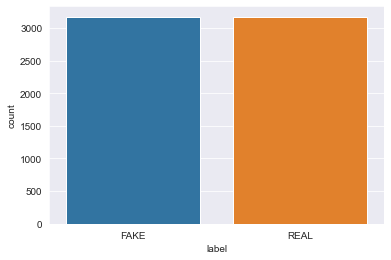

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)

In [11]:
df.groupby('label').count()

,title,text
label,,
FAKE,3164,3164
REAL,3171,3171


In [12]:
messages=df.copy()

In [13]:
messages.reset_index(inplace=True)

In [14]:
#messages.head(10)

In [15]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

In [16]:
cor=[]
ps=PorterStemmer()

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',str(messages['title'][i]))
    review=str(messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    cor.append(review)

In [21]:
cor[3]

"berni support twitter erupt anger dnc: 'we tri warn you!'"

In [22]:
cor

['smell hillary’ fear',
 'watch exact moment paul ryan commit polit suicid trump ralli (video)',
 'kerri go pari gestur sympathi',
 "berni support twitter erupt anger dnc: 'we tri warn you!'",
 'battl new york: primari matter',
 'tehran, usa',
 'girl horrifi watch boyfriend left facetim',
 '‘britain’ schindler’ die 106',
 "fact check: trump clinton 'commander-in-chief' forum",
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa, glimps fire elud hillari clinton’ campaign',
 'donald trump’ shockingli weak deleg game somehow got even wors',
 'strong solar storm, tech risk today | s0 news oct.26.2016 [video]',
 '10 way america prepar world war 3',
 'trump take cruz, lightli',
 'women lead differ',
 'shocking! michel obama & hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden picture... * liberti writer news',
 "what' iran bill obama like?",
 '1 chart explain everyth need know partisanship america',
 'slippe

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline

In [25]:
cv=CountVectorizer()
msg=cv.fit_transform(cor)

In [26]:
msg

<6335x8306 sparse matrix of type '<class 'numpy.int64'>'
	with 47797 stored elements in Compressed Sparse Row format>

In [27]:
tar=messages['label']

In [28]:
msg.shape

(6335, 8306)

In [29]:
tar.shape

(6335,)

In [30]:
tfidf=TfidfTransformer()

In [31]:
tf=tfidf.fit_transform(msg)

In [32]:
tf.shape

(6335, 8306)

In [33]:
from sklearn.model_selection import train_test_split

In [40]:
msg_train,msg_test,tar_train,tar_test=train_test_split(tf,tar,test_size=0.3,random_state=
0)

In [41]:
classifier_mod=PassiveAggressiveClassifier()

In [42]:
classifier_mod.fit(msg_train,tar_train)

PassiveAggressiveClassifier()

In [43]:
classifier_mod.predict(msg_test)

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'REAL', 'REAL'], dtype='<U4')

In [44]:
cm_pred=classifier_mod.predict(msg_test)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
print(classification_report(tar_test,cm_pred))

              precision    recall  f1-score   support

        FAKE       0.77      0.75      0.76       933
        REAL       0.76      0.78      0.77       968

    accuracy                           0.77      1901
   macro avg       0.77      0.77      0.77      1901
weighted avg       0.77      0.77      0.77      1901



In [47]:
print(confusion_matrix(tar_test,cm_pred))

[[698 235]
 [209 759]]


In [48]:
print('The Accuracy Score Is : ',round(accuracy_score(tar_test,cm_pred),2))

The Accuracy Score Is :  0.77


In [49]:
X=messages['title']
y=messages['label']

In [50]:
X.shape

(6335,)

In [51]:
X.shape

(6335,)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train.shape

(5068,)

In [56]:
y_train.shape

(5068,)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [58]:
pipeline=Pipeline([
('bow',CountVectorizer()),
('tfidf',TfidfTransformer()),
('classifier',PassiveAggressiveClassifier()),
])

In [59]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [60]:
pipeline.predict(X_test)

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

In [61]:
pred=pipeline.predict(X_test)

In [62]:
df33=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df33.head(10)

,Actual,Predicted
5446,FAKE,REAL
6047,FAKE,FAKE
2594,FAKE,FAKE
1784,REAL,FAKE
4886,FAKE,FAKE
1713,REAL,FAKE
2924,FAKE,FAKE
2766,REAL,REAL
2636,REAL,REAL
2894,REAL,REAL


In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        FAKE       0.79      0.79      0.79       632
        REAL       0.79      0.80      0.79       635

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267



In [65]:
print('The Accuracy Score Is :',round(accuracy_score(y_test,pred),2))

The Accuracy Score Is : 0.79
